In [1]:
from mcmc import Sampler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_theory(theta):
    return theta[0]*x+theta[1]

std = 2
x,yobs = np.loadtxt('toydata.txt').T
cov = np.diag(np.ones_like(x)*std**2)
inv_cov = np.linalg.inv(cov)
theta=[-3,0,2]

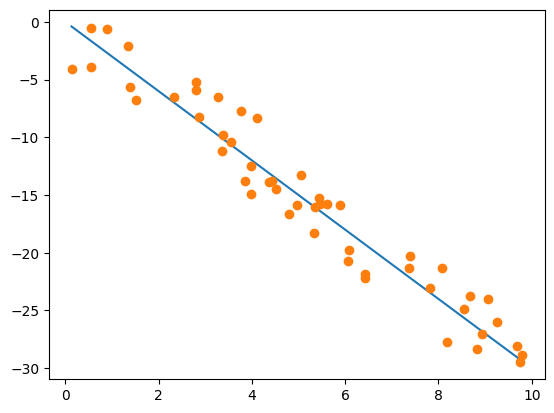

In [3]:
plt.plot(x,-3*x)
plt.plot(x,yobs,'o')

In [4]:
def loglkl(theta,**kwargs):
    theory = get_theory(theta)#theta*x
    delta = theory-yobs
    return (-0.5*np.einsum('i,ij,j->',delta,inv_cov,delta))-0.5*np.log(2*np.pi*np.linalg.det(cov))
def log_prior(theta):
    if -5.0 < theta[0] < 0.5 and -5< theta[1]<5:
        return 0.0
    return -np.inf

def log_probability(theta,**kwargs):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + loglkl(theta,**kwargs)

def init_state():
    return theta[:2]+np.random.uniform(-5,5,2)

In [15]:
s=Sampler(loglkl=log_probability,
         init_state=init_state,
         step_size=[0.5,0.5])


In [16]:
chain=s.get_chain(2)

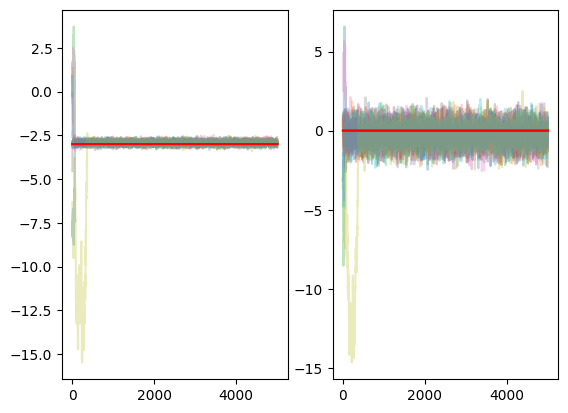

In [18]:
f,ax=plt.subplots(1,2)
for i in range(10):
    chain=s.get_chain(5000)
    ax[0].plot(chain[:,0],alpha=0.3)
    ax[1].plot(chain[:,1],alpha=0.3)
ax[0].plot(np.ones_like(chain)*theta[0],'r')
ax[1].plot(np.ones_like(chain)*theta[1],'r')
#ax[0].set_ylim(1.1*m_true,0.9*m_true)

# emcee

In [8]:
import emcee

pos = theta[:2]+np.random.randn(4,2)
nwalkers, ndim = 4,2

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability
)
sampler.run_mcmc(pos, 5000, progress=True);

100%|█████████████████████████████████████| 5000/5000 [00:00<00:00, 5193.02it/s]


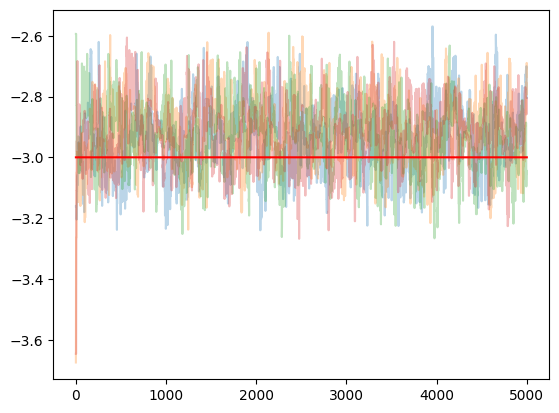

In [9]:
samps=sampler.get_chain()[:,:,0]
plt.plot(samps,alpha=0.3)
plt.plot(np.ones_like(samps[:,0])*theta[0],'r')

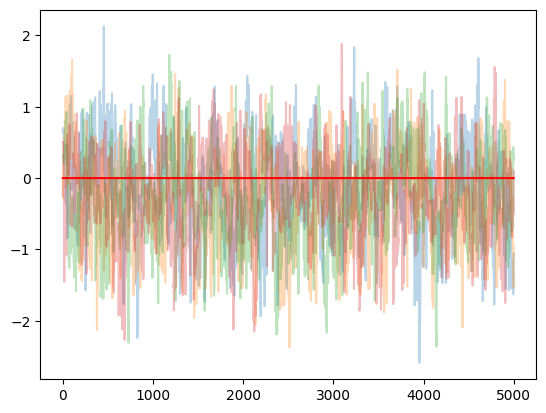

In [10]:
samps=sampler.get_chain()[:,:,1]
plt.plot(samps,alpha=0.3)
plt.plot(np.ones_like(samps[:,1])*theta[1],'r')